In [15]:
import pandas as pd
import requests

In [20]:
# Parameters for pagination
page_number = 1
page_size = 250
total_cards = []

# Retrieve all cards by paginating through the results
while True:
    # Make the API request
    params = {
        'page': page_number,
    }
    response = requests.get('https://api.pokemontcg.io/v2/cards', params=params)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Extract the JSON data from the response
        data = response.json()

        # Append the cards to the list
        total_cards.extend(data['data'])

        # Increment the page number
        page_number += 1

        # Break the loop if retrieved all cards
        if len(data['data']) < page_size:
            break

    else:
        print('Error:', response.status_code)
        break

# Convert the card data into a DataFrame
df = pd.DataFrame(total_cards)

In [21]:
df

,id,name,supertype,subtypes,level,hp,types,evolvesFrom,abilities,attacks,...,nationalPokedexNumbers,legalities,images,tcgplayer,cardmarket,evolvesTo,flavorText,rules,regulationMark,ancientTrait
0,pl1-1,Ampharos,Pokémon,[Stage 2],57,130,[Lightning],Flaaffy,"[{'name': 'Damage Bind', 'text': 'Each Pokémon...","[{'name': 'Gigavolt', 'cost': ['Lightning', 'C...",...,[181],{'unlimited': 'Legal'},{'small': 'https://images.pokemontcg.io/pl1/1....,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,NaN,NaN,NaN,NaN,NaN
1,det1-1,Bulbasaur,Pokémon,[Basic],NaN,60,[Grass],NaN,NaN,"[{'name': 'Find a Friend', 'cost': ['Grass'], ...",...,[1],"{'unlimited': 'Legal', 'expanded': 'Legal'}",{'small': 'https://images.pokemontcg.io/det1/1...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,[Ivysaur],A strange seed was planted on its back at birt...,NaN,NaN,NaN
2,mcd19-1,Caterpie,Pokémon,[Basic],NaN,50,[Grass],NaN,NaN,"[{'cost': ['Grass'], 'name': 'Surprise Attack'...",...,[10],"{'unlimited': 'Legal', 'expanded': 'Legal'}",{'small': 'https://images.pokemontcg.io/mcd19/...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,[Metapod],"When attacked by bird Pokémon, it resists by r...",NaN,NaN,NaN
3,dv1-1,Dratini,Pokémon,[Basic],NaN,40,[Dragon],NaN,NaN,"[{'name': 'Wrap', 'cost': ['Grass', 'Lightning...",...,[147],"{'unlimited': 'Legal', 'expanded': 'Legal'}",{'small': 'https://images.pokemontcg.io/dv1/1....,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,[Dragonair],"It is called the ""Mirage Pokémon"" because so f...",NaN,NaN,NaN
4,xy5-1,Weedle,Pokémon,[Basic],NaN,50,[Grass],NaN,NaN,"[{'name': 'Multiply', 'cost': ['Grass'], 'conv...",...,[13],"{'unlimited': 'Legal', 'expanded': 'Legal'}",{'small': 'https://images.pokemontcg.io/xy5/1....,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,[Kakuna],Its poison stinger is very powerful. Its brigh...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16120,svp-12,Dondozo,Pokémon,[Basic],NaN,150,[Water],NaN,NaN,"[{'name': 'Hammer In', 'cost': ['Water', 'Colo...",...,[977],"{'unlimited': 'Legal', 'standard': 'Legal', 'e...",{'small': 'https://images.pokemontcg.io/svp/12...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,NaN,"This Pokémon is a glutton, but it’s bad at get...",NaN,G,NaN
16121,svp-13,Miraidon,Pokémon,[Basic],NaN,120,[Lightning],NaN,NaN,"[{'name': 'Sharp Fang', 'cost': ['Colorless', ...",...,[1008],"{'unlimited': 'Legal', 'standard': 'Legal', 'e...",{'small': 'https://images.pokemontcg.io/svp/13...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,NaN,Much remains unknown about this creature. It r...,NaN,G,NaN
16122,svp-14,Koraidon,Pokémon,[Basic],NaN,130,[Fighting],NaN,NaN,"[{'name': 'Claw Slash', 'cost': ['Colorless', ...",...,[1007],"{'unlimited': 'Legal', 'standard': 'Legal', 'e...",{'small': 'https://images.pokemontcg.io/svp/14...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,NaN,This seems to be the Winged King mentioned in ...,NaN,G,NaN
16123,swshp-SWSH285,Pikachu V,Pokémon,"[Basic, V]",NaN,200,[Lightning],NaN,NaN,"[{'name': 'Pika Drive', 'cost': ['Lightning', ...",...,[25],"{'unlimited': 'Legal', 'standard': 'Legal', 'e...",{'small': 'https://images.pokemontcg.io/swshp/...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,[Raichu],NaN,"[V rule: When your Pokémon V is Knocked Out, y...",F,NaN


In [22]:
df.to_csv('pokemon_cards.csv', index=False)

In [43]:
from sklearn.cluster import KMeans
import ast
import numpy as np

In [52]:
df = pd.read_csv('pokemon_cards.csv')

df['cardmarket'] = df['cardmarket'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else np.nan)
df['averageSellPrice'] = df['cardmarket'].apply(lambda x: x['prices']['averageSellPrice'] if pd.notnull(x) else np.nan)

df

,id,name,supertype,subtypes,level,hp,types,evolvesFrom,abilities,attacks,...,legalities,images,tcgplayer,cardmarket,evolvesTo,flavorText,rules,regulationMark,ancientTrait,averageSellPrice
0,pl1-1,Ampharos,Pokémon,['Stage 2'],57,130.0,['Lightning'],Flaaffy,"[{'name': 'Damage Bind', 'text': ""Each Pokémon...","[{'name': 'Gigavolt', 'cost': ['Lightning', 'C...",...,{'unlimited': 'Legal'},{'small': 'https://images.pokemontcg.io/pl1/1....,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,NaN,NaN,NaN,NaN,NaN,3.13
1,det1-1,Bulbasaur,Pokémon,['Basic'],NaN,60.0,['Grass'],NaN,NaN,"[{'name': 'Find a Friend', 'cost': ['Grass'], ...",...,"{'unlimited': 'Legal', 'expanded': 'Legal'}",{'small': 'https://images.pokemontcg.io/det1/1...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,['Ivysaur'],A strange seed was planted on its back at birt...,NaN,NaN,NaN,0.39
2,mcd19-1,Caterpie,Pokémon,['Basic'],NaN,50.0,['Grass'],NaN,NaN,"[{'cost': ['Grass'], 'name': 'Surprise Attack'...",...,"{'unlimited': 'Legal', 'expanded': 'Legal'}",{'small': 'https://images.pokemontcg.io/mcd19/...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,['Metapod'],"When attacked by bird Pokémon, it resists by r...",NaN,NaN,NaN,2.39
3,dv1-1,Dratini,Pokémon,['Basic'],NaN,40.0,['Dragon'],NaN,NaN,"[{'name': 'Wrap', 'cost': ['Grass', 'Lightning...",...,"{'unlimited': 'Legal', 'expanded': 'Legal'}",{'small': 'https://images.pokemontcg.io/dv1/1....,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,['Dragonair'],"It is called the ""Mirage Pokémon"" because so f...",NaN,NaN,NaN,1.63
4,xy5-1,Weedle,Pokémon,['Basic'],NaN,50.0,['Grass'],NaN,NaN,"[{'name': 'Multiply', 'cost': ['Grass'], 'conv...",...,"{'unlimited': 'Legal', 'expanded': 'Legal'}",{'small': 'https://images.pokemontcg.io/xy5/1....,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,['Kakuna'],Its poison stinger is very powerful. Its brigh...,NaN,NaN,NaN,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16120,svp-12,Dondozo,Pokémon,['Basic'],NaN,150.0,['Water'],NaN,NaN,"[{'name': 'Hammer In', 'cost': ['Water', 'Colo...",...,"{'unlimited': 'Legal', 'standard': 'Legal', 'e...",{'small': 'https://images.pokemontcg.io/svp/12...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,NaN,"This Pokémon is a glutton, but it’s bad at get...",NaN,G,NaN,0.53
16121,svp-13,Miraidon,Pokémon,['Basic'],NaN,120.0,['Lightning'],NaN,NaN,"[{'name': 'Sharp Fang', 'cost': ['Colorless', ...",...,"{'unlimited': 'Legal', 'standard': 'Legal', 'e...",{'small': 'https://images.pokemontcg.io/svp/13...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,NaN,Much remains unknown about this creature. It r...,NaN,G,NaN,57.00
16122,svp-14,Koraidon,Pokémon,['Basic'],NaN,130.0,['Fighting'],NaN,NaN,"[{'name': 'Claw Slash', 'cost': ['Colorless', ...",...,"{'unlimited': 'Legal', 'standard': 'Legal', 'e...",{'small': 'https://images.pokemontcg.io/svp/14...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,NaN,This seems to be the Winged King mentioned in ...,NaN,G,NaN,4.56
16123,swshp-SWSH285,Pikachu V,Pokémon,"['Basic', 'V']",NaN,200.0,['Lightning'],NaN,NaN,"[{'name': 'Pika Drive', 'cost': ['Lightning', ...",...,"{'unlimited': 'Legal', 'standard': 'Legal', 'e...",{'small': 'https://images.pokemontcg.io/swshp/...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,['Raichu'],NaN,"['V rule: When your Pokémon V is Knocked Out, ...",F,NaN,1.34


In [53]:
# Drop rows with NaN values in the 'averageSellPrice' column
df.dropna(subset=['averageSellPrice'], inplace=True)

# Extract the 'averageSellPrice' column as a separate dataframe
X = df[['averageSellPrice']]

# Create an instance of the KMeans algorithm with 10 clusters
kmeans = KMeans(n_clusters=10)

# Fit the data to the k-means algorithm
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Assign the cluster labels to a new column in the dataframe
df['cluster'] = labels

# Get the average sell price for each cluster
cluster_avg_price = df.groupby('cluster')['averageSellPrice'].mean()

# Sort the clusters by average sell price in descending order
sorted_clusters = cluster_avg_price.sort_values(ascending=False)

# Get the 10 clusters with the highest average sell price
top_clusters = sorted_clusters.head(10).index.tolist()

# Filter the dataframe to include only the cards in the top clusters
filtered_df = df[df['cluster'].isin(top_clusters)]

# Group the cards by cluster and get the top 10 cards within each cluster
top_cards = filtered_df.groupby('cluster').apply(lambda x: x.nlargest(10, 'averageSellPrice')).reset_index(drop=True)

C:\Users\Sean\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [62]:
for cluster_id in sorted(top_clusters):
    cluster_cards = top_cards[top_cards['cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:")
    for index, card in cluster_cards.iterrows():
        print(f"Card: {card['name']}, Average Sell Price: {card['averageSellPrice']}")
    print('\n')

Cluster 0:
Card: Pikachu & Zekrom-GX, Average Sell Price: 8.74
Card: Team Flare Grunt, Average Sell Price: 8.72
Card: Shrine of Punishment, Average Sell Price: 8.72
Card: Marshadow & Machamp-GX, Average Sell Price: 8.7
Card: Urn of Vitality, Average Sell Price: 8.7
Card: Lapras, Average Sell Price: 8.69
Card: Aggron, Average Sell Price: 8.69
Card: Alolan Marowak-GX, Average Sell Price: 8.68
Card: Nessa, Average Sell Price: 8.68
Card: Ampharos, Average Sell Price: 8.67


Cluster 1:
Card: Charizard, Average Sell Price: 674.99
Card: Rayquaza-GX, Average Sell Price: 650.0
Card: Shining Tyranitar, Average Sell Price: 642.5
Card: Hitmonchan, Average Sell Price: 550.0
Card: Umbreon VMAX, Average Sell Price: 546.09
Card: Lucky Stadium, Average Sell Price: 537.5
Card: Mewtwo ★, Average Sell Price: 507.5


Cluster 2:
Card: Championship Arena, Average Sell Price: 2999.0


Cluster 3:
Card: Pikachu ★, Average Sell Price: 299.99
Card: Rayquaza VMAX, Average Sell Price: 295.86
Card: Vaporeon ★, Avera

Charizard: 4
Pikachu: 3
Mewtwo: 6
Umbreon: 3
Espeon: 2
Rayquaza: 2
Gengar: 2
Lugia: 2
Blaziken: 2
Gyarados: 2
Ampharos: 2
Vaporeon: 2
Golem: 1
Giratina: 1
Regirock: 1
Celebi: 1
Ho-oh: 1
Dialga: 1
Sylveon: 1
Altaria: 1
Ninetales: 1
Armaldo: 1
Pidgeot: 1
Lusamine: 1
Metagross: 1
Raikou: 1
Pokémon Center: 1
Tropical Tidal Wave: 1
Delcatty: 1
Jolteon: 1
Torchic: 1
Latias: 1
Champions Festival: 1
Blastoise: 1
Emboar: 1
Lunala: 1
Arceus: 1
Groudon: 1

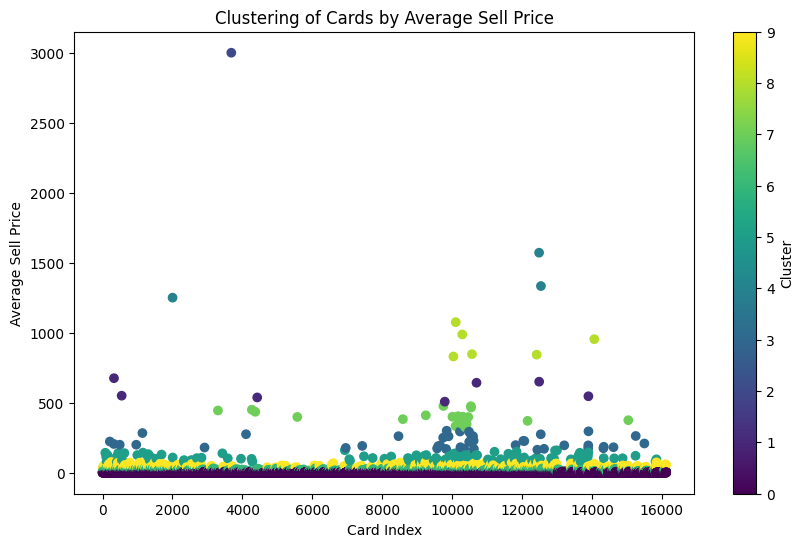

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['averageSellPrice'], c=df['cluster'], cmap='viridis')
plt.xlabel('Card Index')
plt.ylabel('Average Sell Price')
plt.title('Clustering of Cards by Average Sell Price')
plt.colorbar(label='Cluster')

plt.show()